In [1]:
import cv2

In [2]:
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
import matplotlib.pyplot as plt

In [3]:
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
list1 = []
for i in range(1,16):
    a = str(i)
    b = str('(')
    c = str(')')
    result = b+a+c
    list1.append('1 '+ result + '.jpg' )
    
list2 = []
for i in range(1,16):
    a = str(i)
    b = str('(')
    c = str(')')
    result = b+a+c
    list2.append('2 '+ result + '.jpg' )

list3 = []
for i in range(1,22):
    a = str(i)
    b = str('(')
    c = str(')')
    result = b+a+c
    list3.append('3 '+ result + '.jpg' )
    
list4 = []
for i in range(1,5):
    a = str(i)
    b = str('(')
    c = str(')')
    result = b+a+c
    list4.append('4 '+ result + '.jpg' )
    
list5 = []
for i in range(1,4):
    a = str(i)
    b = str('(')
    c = str(')')
    result = b+a+c
    list5.append('5 '+ result + '.jpg' )
    
list6 = []
for i in range(1,9):
    a = str(i)
    b = str('(')
    c = str(')')
    result = b+a+c
    list6.append('6 '+ result + '.jpg' )

In [5]:
list_total = list1 + list2 + list3 + list4 + list5 + list6
len(list_total)

66

In [26]:
j = 1
for i in range(66):
    pixels = imread(list_total[i])
    #pixels = cv2.cvtColor(pixels1, cv2.COLOR_BGR2GRAY)
    
    classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
    bboxes = classifier.detectMultiScale(pixels, 1.3, 5)
    
    for box in bboxes:
        x1, y1, w, h = box
        x2, y2 = x1 + w, y1 + h
        rectangle(pixels, (x1, y1), (x2, y2), (0,0,255), 1)
        roi_color = pixels[y1:y2, x1:x2]
        name = '/Users/boxtim/Desktop/JHU2022Spring/DeepLearning/FinalProject/OpenCV_2/' +str(j)+list_total[i]
        cv2.imwrite(name,roi_color)
        j = j + 1
        

In [10]:
import matplotlib.pyplot as plt

at 1.3 false positive rate is 0.3448275862068966
at 1.2 false positive rate is 0.49612403100775193


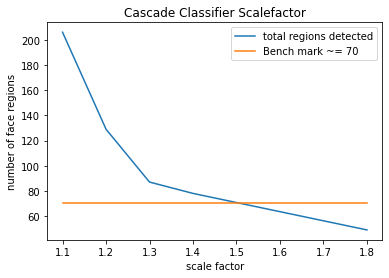

In [29]:
## Change ScaleFactor 
scale_factor = [1.1, 1.2, 1.3, 1.4, 1.8]
total_faces =[206, 129, 87, 78, 49]
bench_mark = [70,70,70, 70, 70]

plt.plot(scale_factor, total_faces, label = 'total regions detected');
plt.plot(scale_factor, bench_mark, label = 'Bench mark ~= 70');
plt.xlabel('scale factor')
plt.ylabel('number of face regions')
plt.title('Cascade Classifier Scalefactor')
plt.legend();
print('at 1.3 false positive rate is', 30/87)
print('at 1.2 false positive rate is', 64/129)

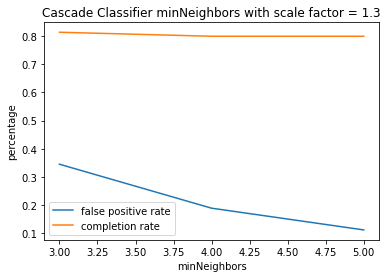

In [28]:
#change minNeighbors: how robust each detector must be in order to be reported, pick scale at 1.3
minNeighbors = [3, 4, 5]
false_positive =[30/87, 13/69, 7/63]
completion_rate = [57/70, 56/70, 56/70]
bench_mark = [0.5,0.5, 0.5]


plt.plot(minNeighbors, false_positive, label = 'false positive rate');
plt.plot(minNeighbors, completion_rate, label = 'completion rate');
plt.xlabel('minNeighbors')
plt.ylabel('percentage')
plt.title('Cascade Classifier minNeighbors with scale factor = 1.3')
plt.legend();